<a href="https://colab.research.google.com/github/vgaurav3011/EIP-3.0-/blob/master/Week%205/Misclassification_of_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
import matplotlib.pyplot as plt
def plot_img(i):
    # plot the image and the target for sample i
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

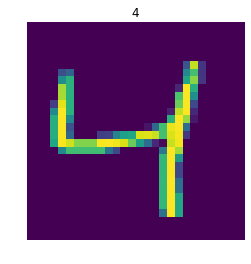

In [10]:
plot_img(2)

([array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
  array([26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
  array([26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
  array([24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
  array([21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.]),
  array([20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.]),
  array([20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.]),
  array([18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.]),
  array([15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.]),
  array([15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.]),
  array([16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.]),
  array([18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.]),
  array([15.,  1.,  0., 

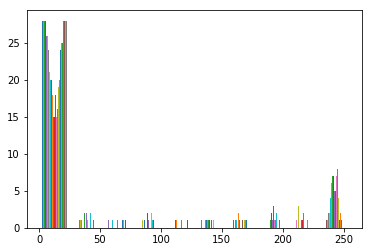

In [11]:
plt.hist(x_train[0])

([array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
  array([26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
  array([26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
  array([24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
  array([21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.]),
  array([20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.]),
  array([20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.]),
  array([18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.]),
  array([15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.]),
  array([15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.]),
  array([16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.]),
  array([18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.]),
  array([15.,  1.,  0., 

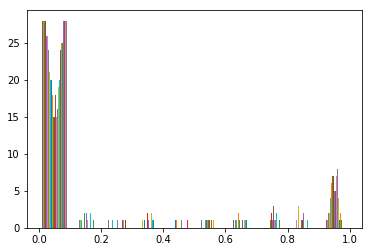

In [12]:
import numpy as np
x_train = x_train/255.
plt.hist(x_train[0])

In [0]:
x_test = x_test/255.

In [14]:
y_train[0]

5

In [16]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


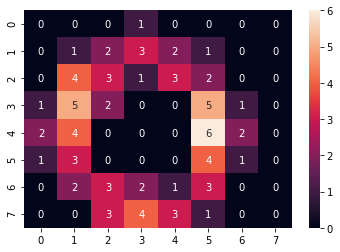

In [17]:
import numpy as np
import seaborn as sns

# building the image of a zero:
zero = np.array([[0,0,0,1,0,0,0,0],
                 [0,1,2,3,2,1,0,0],
                 [0,4,3,1,3,2,0,0],
                 [1,5,2,0,0,5,1,0],
                 [2,4,0,0,0,6,2,0],
                 [1,3,0,0,0,4,1,0],
                 [0,2,3,2,1,3,0,0],
                 [0,0,3,4,3,1,0,0]])
sns.heatmap(zero, annot=True)

In [0]:
from skimage.util import view_as_blocks
pooling_window_shape = (2,2)
view = view_as_blocks(zero, pooling_window_shape)
flatten_view = view.reshape(view.shape[0], view.shape[1], -1)
mean_view = np.mean(flatten_view, axis=2)
max_view = np.max(flatten_view, axis=2)

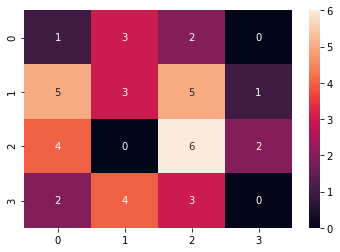

In [19]:
sns.heatmap(max_view, annot=True)

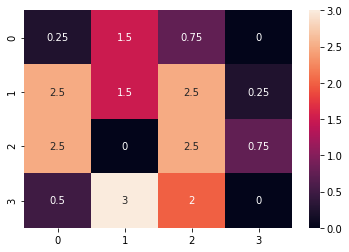

In [20]:
sns.heatmap(mean_view, annot=True)

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )
model.add( layers.Conv2D(10, 4, input_shape=(28,28,1), activation='relu') )

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 10)        1610      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 19, 19, 10)        1610      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 10)        1610      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 10)        1610      
Total params: 6,610
Trainable params: 6,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add( layers.Flatten() )
model.add( layers.Dense(100, activation='relu') )

In [0]:
model.add( layers.Dense(10, activation='softmax') )

In [0]:
from keras.optimizers import RMSprop

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0718 17:35:07.001604 140363128514432 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
kx_train = x_train.reshape(len(x_train),28,28,1)
kx_test = x_test.reshape(len(x_test),28,28,1)

In [41]:
history = model.fit(kx_train, y_train, validation_data=(kx_test,y_test),
                    batch_size=512, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0694 - acc: 0.9787 - val_loss: 0.0690 - val_acc: 0.9783
Epoch 2/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.0502 - acc: 0.9848 - val_loss: 0.0448 - val_acc: 0.9853
Epoch 3/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0546 - val_acc: 0.9824
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0316 - acc: 0.9903 - val_loss: 0.0727 - val_acc: 0.9787
Epoch 5/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0269 - acc: 0.9915 - val_loss: 0.0853 - val_acc: 0.9778
Epoch 6/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0214 - acc: 0.9934 - val_loss: 0.0793 - val_acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0174 - acc: 0.9946 - val_loss: 0.0900 - val_acc

In [0]:
def plot_accuracy(history, miny=None):
  acc = history.history['acc']
  test_acc = history.history['val_acc']
  epochs = range(len(acc))
  plt.plot(epochs, acc)
  plt.plot(epochs, test_acc)
  if miny:
    plt.ylim(miny, 1.0)
  plt.title('accuracy') 
  plt.figure()

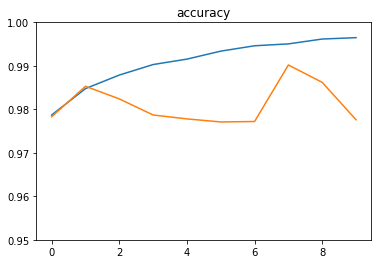

<Figure size 432x288 with 0 Axes>

In [43]:
plot_accuracy(history, miny=0.95)

In [46]:
preds = model.predict(kx_test)
pred_digits = np.argmax(preds, axis=1)
y_digits = np.argmax(y_test, axis=1)
print(pred_digits)
print(y_digits)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [47]:
mispred_img = x_test[pred_digits!=y_digits]
mispred_true = y_digits[pred_digits!=y_digits]
mispred_pred = pred_digits[pred_digits!=y_digits]
print('number of misclassified digits:', mispred_img.shape[0])

number of misclassified digits: 224


In [0]:
def plot_img_results(array, true, pred, i, n=1):
    # plot the image and the target for sample i
    ncols = 5
    nrows = n/ncols + 1
    fig = plt.figure( figsize=(ncols*1.5, nrows*1.5), dpi=90)
    for j in range(n):
      index = j+i
      plt.subplot(nrows,ncols, j+1)
      plt.imshow(array[index])
      plt.title('true: {} pred: {}'.format(true[index], pred[index]))
      plt.axis('off')

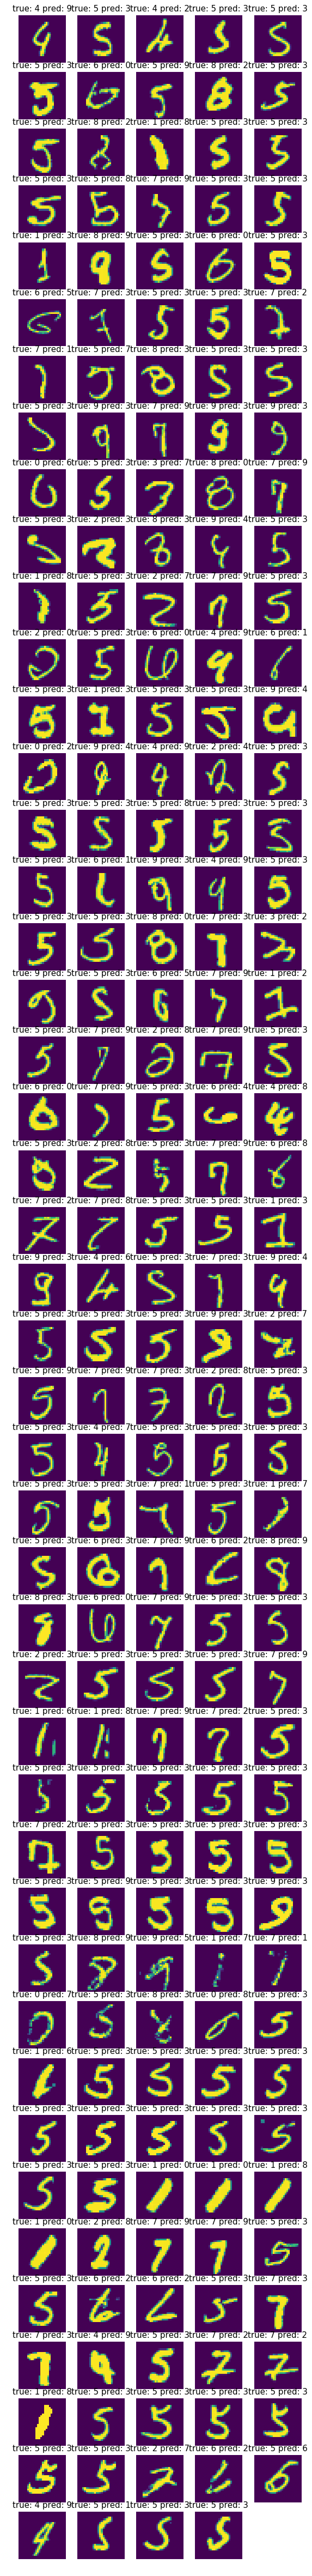

In [49]:
plot_img_results(mispred_img, mispred_true, mispred_pred, 0, len(mispred_img))